## Library

In [19]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

## Dataset

In [2]:
df = pd.read_csv(os.getcwd() + "/dataset/dataset_scaled.csv")
df.tail(3)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760,0
766,766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732,1
767,767,-0.844885,-0.873019,0.046245,0.656358,-0.692891,-0.202129,-0.473785,-0.871374,0


In [3]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

## Oversampling

In [4]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [5]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

## Tran-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 9)
(700,)
(300, 9)
(300,)


## Function: Model Fit & Eval

In [8]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # fit & predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # accuracy, conf. metric, class. report
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # AUC
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else model.decision_function(X_test)
    auc = roc_auc_score(y_test, y_prob)
    
    # print result
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print(f"AUC: {auc:.4f}")
    
    # conf. metric
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    plt.show()

## Random Forest

In [11]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10], 
    'min_samples_split': [2, 10], 
    'min_samples_leaf': [1, 4],
    'max_features': ['log2', 'sqrt'],
    'bootstrap': [True],   
    'criterion': ['gini']  
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.8071428571428573


Accuracy: 0.8233
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       150
           1       0.81      0.84      0.83       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

AUC: 0.8961


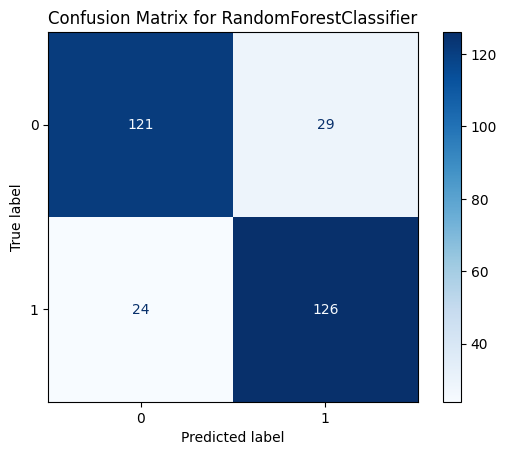

In [12]:
model = RandomForestClassifier(bootstrap=True, criterion='gini', max_depth=10, max_features='sqrt', min_samples_leaf=4, min_samples_split=2, n_estimators=200)
evaluate_model(model, X_train, y_train, X_test, y_test)

## Gradient Boost

In [13]:
model = GradientBoostingClassifier()
param_grid = {
    'n_estimators': [100, 200], 
    'learning_rate': [0.1],  
    'max_depth': [3, 5],   
    'min_samples_split': [2], 
    'min_samples_leaf': [1, 2],  
    'subsample': [1.0],  
    'max_features': ['sqrt'] 
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 1.0}
Best score: 0.7914285714285714


Accuracy: 0.8167
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       150
           1       0.81      0.83      0.82       150

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

AUC: 0.8941


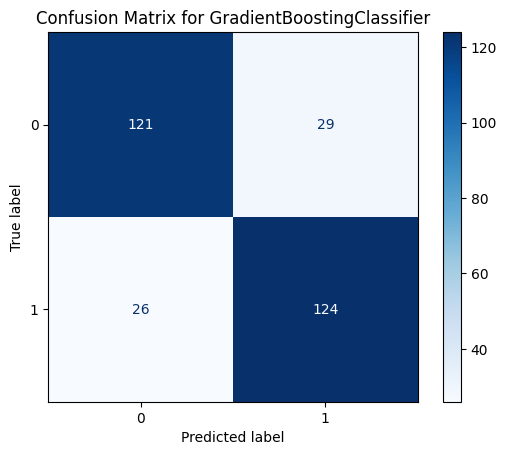

In [15]:
model = GradientBoostingClassifier(learning_rate=0.1, max_depth=3, max_features='sqrt', min_samples_leaf=2, min_samples_split=2, n_estimators=100, subsample=1.0)
evaluate_model(model, X_train, y_train, X_test, y_test)

## XG Boost

In [29]:
model = XGBClassifier()
param_grid = {
    'n_estimators': [10, 100],  
    'learning_rate': [0.1, 0.2],  
    'max_depth': [5, 7]
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 10}
Best score: 0.7714285714285714


Accuracy: 0.8300
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       150
           1       0.82      0.84      0.83       150

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

AUC: 0.8996


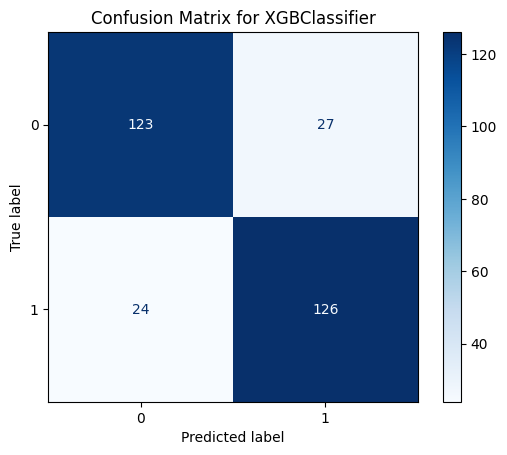

In [35]:
model = XGBClassifier(n_estimators=100, learning_rate=0.2, max_depth=5)
evaluate_model(model, X_train, y_train, X_test, y_test)

Processing /home/conda/feedstock_root/build_artifacts/anyio_1726931217849/work (from -r requirements.txt (line 14))
ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: '/home/conda/feedstock_root/build_artifacts/anyio_1726931217849/work'

Note: you may need to restart the kernel to use updated packages.
